In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os

2023-08-23 21:32:29.489276: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-23 21:32:29.574258: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-23 21:32:29.575572: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-23 21:32:31.071378: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
# Load model via "saved_model" format
model = tf.keras.models.load_model('../model')

2023-08-23 21:32:33.864653: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [3]:
image_path = "../images/NRC_digits/five.png"
image = tf.keras.preprocessing.image.load_img(image_path) # load image
image = cv2.cvtColor(np.array(image), cv2.COLOR_BGR2GRAY) # convert to Grayscale
image = cv2.resize(image, (28, 28), interpolation=cv2.INTER_LINEAR) # rescale the image
# Apply thresholding to remove noise and enhance contrast
threshold_value = 107  # Adjust this threshold as needed
_, thresholded_image = cv2.threshold(image, threshold_value, 255, cv2.THRESH_BINARY)

In [4]:
image = tf.expand_dims(thresholded_image, axis=-1)
image = tf.cast(image, tf.float32)
image = 255 - np.array(image)
np.array(image).shape

(28, 28, 1)

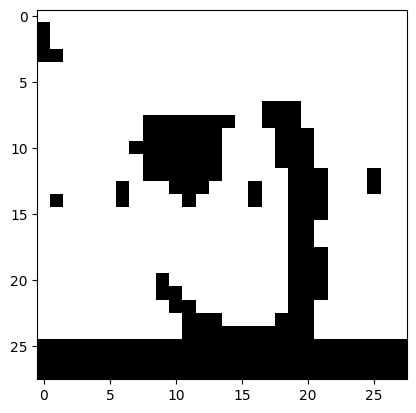

In [5]:
plt.imshow(image, cmap="Greys")

In [6]:
img_input = tf.expand_dims(image, axis=0)
img_input.shape

TensorShape([1, 28, 28, 1])

In [7]:
y_input_pred = model.predict(img_input)
print(np.argmax(y_input_pred))
print("Achieved a {:.2%} accuracy rate.".format(np.max(y_input_pred)))

1/1 [==============================] - 0s 260ms/step
5
Achieved a 99.58% accuracy rate.


# Visualization

In [8]:
os.chdir('../images/NRC_digits/')
examples = []
for example in os.listdir():
    examples.append(tf.keras.preprocessing.image.load_img(example))

len(examples)

6

In [9]:
def preprocess(image):
    image = cv2.cvtColor(np.array(image), cv2.COLOR_BGR2GRAY) # convert to Grayscale
    image = cv2.resize(image, (28, 28), interpolation=cv2.INTER_LINEAR) # rescale the image
    # Apply thresholding to remove noise and enhance contrast
    threshold_value = 107  # Adjust this threshold as needed
    _, thresholded_image = cv2.threshold(image, threshold_value, 255, cv2.THRESH_BINARY)
    image = tf.expand_dims(thresholded_image, axis=-1)
    image = tf.cast(image, tf.float32)
    image = 255 - np.array(image)
    image = tf.expand_dims(image, axis=0)
    return image

1/1 [==============================] - 0s 16ms/step


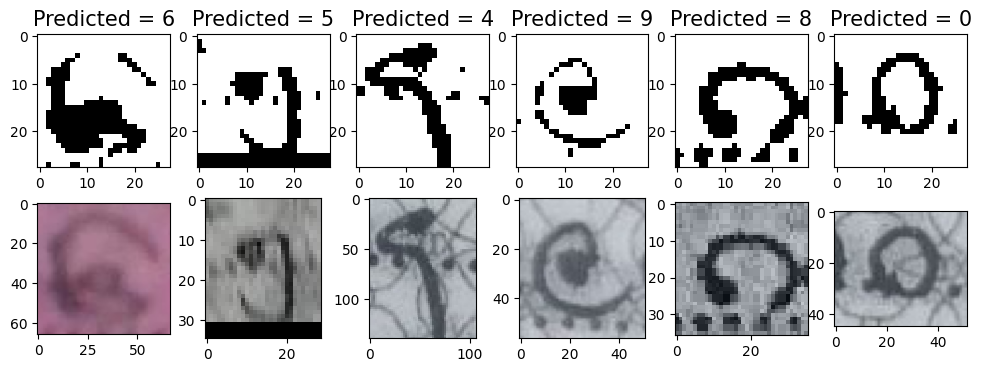

In [10]:
# Create a figure with 2 rows and 6 columns
fig, axes = plt.subplots(2, 6, figsize=(12, 4))

for i in range(6):  # Display only examples from 0 to 5
    ax = axes[0, i]  # First row
    ax.imshow(tf.squeeze(preprocess(examples[i]), axis=0), cmap='Greys')
    pred_label = np.argmax(model.predict(preprocess(examples[i])))
    ax.set_title(f'Predicted = {pred_label}', size=15)

    ax = axes[1, i]  # Second row
    ax.imshow(examples[i], cmap='Greys')

plt.show()

---